# Comparing WL mass centroids to X-ray centroids

Here we compare the weak-lensing mass distribution centroids (measured by previous LoVoCCS work) to the X-ray centroids that we have measured - we also compare the offsets measured between ICM centroid/WL Mass centroid and the offsets measured between ICM centroid/BCG position.

## Import Statements

In [24]:
import numpy as np
import pandas as pd
from astropy.units import Quantity
from astropy.cosmology import LambdaCDM
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter

# import xga
# xga.NUM_CORES = 5
# temp_dir = xga.OUTPUT
# actual_dir = temp_dir.split('notebooks/')[0]+'notebooks/xga_output/'
# xga.OUTPUT = actual_dir
# xga.utils.OUTPUT = actual_dir
# # As currently XGA will setup an xga_output directory in our current directory, I remove it to keep it all clean
# if os.path.exists('xga_output'):
#     rmtree('xga_output')
# from xga.sourcetools import ang_to_rad

%matplotlib inline

## TEMPORARY

In [2]:
cosmo = LambdaCDM(70, 0.3, 0.7)
cosmo

LambdaCDM(H0=70 km / (Mpc s), Om0=0.3, Ode0=0.7, Tcmb0=0 K, Neff=3.04, m_nu=None, Ob0=None)

In [3]:
def ang_to_rad(ang: Quantity, z: float, cosmo = cosmo) -> Quantity:
    """
    The counterpart to rad_to_ang, this converts from an angle to a radius in kpc.

    :param Quantity ang: Angle to be converted to radius.
    :param Cosmology cosmo: An instance of an astropy cosmology, the default is a flat LambdaCDM concordance model.
    :param float z: The _redshift of the source.
    :return: The radius in kpc.
    :rtype: Quantity
    """
    d_a = cosmo.angular_diameter_distance(z)
    rad = (ang.to("deg").value * (np.pi / 180) * d_a).to("kpc")
    return rad

## Reading in the results

We read in the LoVoCCS results we need to be able to compare the overall mass distribution and the X-ray ICM distribution:

In [4]:
xray_res = pd.read_csv("../../outputs/coordinates/xmm_500kpc_centroid.csv")
xray_res['LoVoCCSID'] = xray_res['LoVoCCS_name'].apply(lambda x: x.split('-')[1])
xray_res

,LoVoCCS_name,cent_ra,cent_ra-,cent_ra+,cent_dec,cent_dec-,cent_dec+,position_angle,position_angle-,position_angle+,ax_ratio,ax_ratio-,ax_ratio+,LoVoCCSID
0,LoVoCCS-1,227.73319,0.00002,0.00002,5.74323,0.00002,0.00002,-163.2287,0.1878,0.2336,0.9179,0.0010,0.0012,1
1,LoVoCCS-2,44.73666,0.00015,0.00020,13.57764,0.00016,0.00016,-66.6192,4.4151,4.5963,0.9725,0.0055,0.0046,2
2,LoVoCCS-4,10.46009,0.00003,0.00003,-9.30464,0.00005,0.00003,157.3862,0.1785,0.1713,0.8917,0.0011,0.0009,4
3,LoVoCCS-5,303.14178,0.00013,0.00013,-56.83836,0.00007,0.00007,-49.9254,0.2451,0.1678,0.8331,0.0013,0.0011,5
4,LoVoCCS-7,330.47797,0.00019,0.00020,-59.94793,0.00011,0.00012,-168.0726,0.8656,0.8021,0.9492,0.0036,0.0038,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,LoVoCCS-119,125.25839,0.00007,0.00006,7.86452,0.00008,0.00008,-80.7086,1.8766,1.8226,0.9703,0.0052,0.0064,119
57,LoVoCCS-121,52.48007,0.00035,0.00034,-52.58021,0.00017,0.00023,-140.9563,4.2228,4.3894,0.9607,0.0053,0.0069,121
58,LoVoCCS-123,193.67578,0.00031,0.00039,-29.22863,0.00027,0.00029,147.6039,2.2260,2.2397,0.9173,0.0059,0.0064,123
59,LoVoCCS-131,137.65149,0.00050,0.00041,-10.58244,0.00044,0.00050,261.3377,3.1668,2.9612,0.9590,0.0136,0.0141,131


Then we read in a file containing the centroids and position angles of the weak-lensing 2D mass distributions measured by [Fu et al. 2024](https://ui.adsabs.harvard.edu/abs/2024arXiv240210337F/abstract) (the second LoVoCCS publication) - this file also includes the centroids and angles of the red sequence galaxy population. Several measures of the orientation angle are present in the LoVoCCSII paper, but we make use of the mass and red-sequence orientations measured within 1000 kpc. 

We note that some entries are null because of low signal to noise in the weak-lensing shear maps, and some are null because we have split the particular LoVoCCS cluster into several components in our sample:

In [5]:
wlmass_res = pd.read_csv("../../sample_files/X-LoVoCCSI_centroid_pa_results.csv")
wlmass_res

,LoVoCCSID,Name,mass_cent_ra,mass_cent_dec,mass_pos_angle_1Mpc,redseq_cent_ra,redseq_cent_dec,redseq_pos_angle_1Mpc
0,1,A2029,227.73,5.78,84.0,227.74,5.77,-74.0
1,2,A401,44.74,13.58,1.0,44.74,13.58,-48.0
2,4A,A85North,10.45,-9.33,-84.0,10.41,-9.31,72.0
3,4B,A85South,NaN,NaN,NaN,NaN,NaN,NaN
4,5,A3667,303.14,-56.85,80.0,303.15,-56.84,44.0
...,...,...,...,...,...,...,...,...
62,121,A3128,52.64,-52.53,78.0,52.62,-52.56,-87.0
63,122,A1023,157.00,-6.79,-20.0,156.99,-6.79,53.0
64,123,A3528,193.61,-29.00,-76.0,193.59,-29.00,77.0
65,131,A761,137.65,-10.59,32.0,137.68,-10.59,18.0


We also have to read in the sample file, because neither of these results files contain redshift information:

In [6]:
samp = pd.read_csv("../../sample_files/X-LoVoCCSI.csv")
samp

,LoVoCCSID,Name,start_ra,start_dec,MCXC_Redshift,MCXC_R500,MCXC_RA,MCXC_DEC,manual_xray_ra,manual_xray_dec,MCXC_Lx500_0.1_2.4
0,1,A2029,227.734300,5.745471,0.0766,1.3344,227.73000,5.720000,227.734300,5.745471,8.726709e+44
1,2,A401,44.740000,13.580000,0.0739,1.2421,44.74000,13.580000,NaN,NaN,6.088643e+44
2,4A,A85North,10.458750,-9.301944,0.0555,1.2103,10.45875,-9.301944,NaN,NaN,5.100085e+44
3,4B,A85South,10.451487,-9.460007,0.0555,1.2103,10.45875,-9.301944,10.451487,-9.460007,5.100085e+44
4,5,A3667,303.157313,-56.845978,0.0556,1.1990,303.13000,-56.830000,303.157313,-56.845978,4.871933e+44
...,...,...,...,...,...,...,...,...,...,...,...
62,121,A3128,52.466189,-52.580728,0.0624,0.8831,52.50000,-52.600000,52.466189,-52.580728,1.101682e+44
63,122,A1023,157.000000,-6.800000,0.1176,0.8553,157.00000,-6.800000,NaN,NaN,1.095941e+44
64,123,A3528,193.670000,-29.220000,0.0544,0.8855,193.67000,-29.220000,NaN,NaN,1.093054e+44
65,131,A761,137.651250,-10.581111,0.0916,0.8627,137.65125,-10.581111,NaN,NaN,1.063423e+44


We also read in the relevant BCG sample, as we also wish to see how the ICM-BCG and ICM-WL mass offsets correlate:

In [8]:
bcg_samp = pd.read_csv("../../sample_files/X-LoVoCCSI_BCG_cands.csv")
bcg_samp.head(5)

,LoVoCCSID,cluster_name,bcg1_name,bcg1_ra,bcg1_dec,bcg1_z,bcg1_z_src,bcg1_pa,bcg1_pa_src,bcg1_vlass,...,bcg2_notes,bcg3_name,bcg3_ra,bcg3_dec,bcg3_z,bcg3_z_src,bcg3_pa,bcg3_pa_src,bcg3_vlass,bcg3_notes
0,1,A2029,NaN,227.7337,5.7449,0.07800,https://dev-rcsed2.voxastro.org/data/galaxy/38386,24.8,RCSED,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,A401,NaN,44.7410,13.5829,0.07390,https://dev-rcsed2.voxastro.org/data/galaxy/7117,29.0,RCSED,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4A,A85North,NaN,10.4602,-9.3032,0.05536,https://dev-rcsed2.voxastro.org/data/galaxy/1604,148.9,RCSED,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4B,A85South,NaN,10.4288,-9.4395,0.05630,https://dev-rcsed2.voxastro.org/data/galaxy/1588,135.4,RCSED,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,A3667,NaN,303.1139,-56.8266,0.05540,https://dev-rcsed2.voxastro.org/data/galaxy/44960,143.3,RCSED,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We merge the dataframes to make things easier down the line - it is important to note that the weak-lensing derived properties were measured for the originally identified LoVoCCS clusters (i.e. just LoVoCCS-4 rather than LoVoCCS-4A and 4B separately) - we have since split the identifiers into multiple entries for those clusters that have distinct sub-components.

In [14]:
comb = pd.merge(samp[['LoVoCCSID', 'MCXC_Redshift']], xray_res, on='LoVoCCSID')
print(comb.shape)
comb = pd.merge(comb, wlmass_res, on='LoVoCCSID')
comb = pd.merge(comb, bcg_samp, on='LoVoCCSID')
comb.head(5)

(60, 15)


,LoVoCCSID,MCXC_Redshift,LoVoCCS_name,cent_ra,cent_ra-,cent_ra+,cent_dec,cent_dec-,cent_dec+,position_angle,...,bcg2_notes,bcg3_name,bcg3_ra,bcg3_dec,bcg3_z,bcg3_z_src,bcg3_pa,bcg3_pa_src,bcg3_vlass,bcg3_notes
0,1,0.0766,LoVoCCS-1,227.73319,0.00002,0.00002,5.74323,0.00002,0.00002,-163.2287,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.0739,LoVoCCS-2,44.73666,0.00015,0.00020,13.57764,0.00016,0.00016,-66.6192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,0.0556,LoVoCCS-5,303.14178,0.00013,0.00013,-56.83836,0.00007,0.00007,-49.9254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,0.0980,LoVoCCS-7,330.47797,0.00019,0.00020,-59.94793,0.00011,0.00012,-168.0726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,0.0589,LoVoCCS-9,67.84353,0.00024,0.00018,-61.43197,0.00012,0.00010,237.5834,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Comparing ICM and weak-lensing mass distribution centroids

We calculate the Haversine distance between the ICM and WL mass distribution centroids - this angular offset is then used to calculate the proper distance offset in kpc. The cosmology used here is the XGA default, and the same that we use throughout the LoVoCCS analyses:

In [11]:
icm_ra = comb['cent_ra'].values
icm_dec = comb['cent_dec'].values

wl_ra = comb['mass_cent_ra'].values
wl_dec = comb['mass_cent_dec'].values

hav_sep = 2 * np.arcsin(np.sqrt((np.sin(((icm_dec*(np.pi / 180))-(wl_dec*(np.pi / 180))) / 2) ** 2)
                                    + np.cos((wl_dec * (np.pi / 180))) * np.cos(icm_dec * (np.pi / 180))
                                    * np.sin(((icm_ra*(np.pi / 180)) - (wl_ra*(np.pi / 180))) / 2) ** 2))
# Converting back to degrees from radians
hav_sep /= (np.pi / 180)
hav_sep = Quantity(hav_sep, 'deg').to('arcmin')

# Also calculate the proper distance at each cluster's redshift in kpc
prop_hav_sep = ang_to_rad(hav_sep, comb['MCXC_Redshift'].values)
prop_hav_sep

<Quantity [192.84775823,  20.2975082 ,  45.40595404,  78.22937442,
            85.77226093,  78.12701134, 566.95228828, 171.52743358,
           182.93665892,  92.81677055,  74.92823472, 115.82414139,
            89.08132438,  47.01516297, 502.86690691, 154.45768832,
           107.64179703, 136.17116892,  52.51598503,  96.27429319,
           111.60564767, 192.12023082, 319.85845211, 879.36788752,
                    nan,  67.12083839, 392.55525357, 130.4901228 ,
                    nan,          nan,   1.78663776,          nan,
            53.78946929, 295.9554466 , 156.19873054, 133.33286661,
                    nan, 167.55156776, 105.74686885, 197.9981372 ,
            49.76213874,          nan, 157.01270485,  79.91127824,
           373.86723415,          nan,   3.89977114,  88.79065809,
           100.05728345,          nan, 716.24407414,          nan,
            91.33364285,  97.40407274,  28.62442075,  41.20899053,
           473.62655765, 897.88908269,  47.28774349,          

### Distribution of offsets

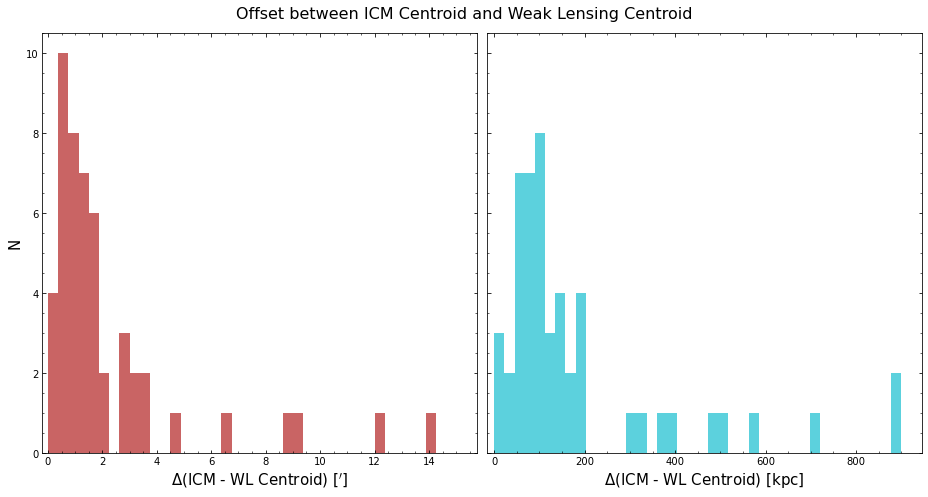

In [12]:
fig, ax_arr = plt.subplots(1, 2, figsize=(13, 7), sharey=True)
for ax in ax_arr:
    ax.minorticks_on()
    ax.tick_params(which='both', direction='in', top=True, right=True)

sep_bins = np.linspace(0, 15, 41)
if hav_sep.max().value > sep_bins.max():
    print("Largest separation value is greater than the extent of the manual bins that were applied.")
ax_arr[0].hist(hav_sep.value, bins=sep_bins, color='firebrick', histtype='stepfilled', alpha=0.7)
ax_arr[0].set_xlabel(r"$\Delta$(ICM - WL Centroid) [$^{\prime}$]", fontsize=15)
ax_arr[0].set_xlim(-0.2)

prop_sep_bins = np.linspace(0, 900, 41)
ax_arr[1].hist(prop_hav_sep.value, bins=prop_sep_bins, color='tab:cyan', histtype='stepfilled', alpha=0.7)
ax_arr[1].set_xlabel(r"$\Delta$(ICM - WL Centroid) [kpc]", fontsize=15)
ax_arr[1].set_xlim(-15)

ax_arr[0].set_ylabel('N', fontsize=15)
plt.suptitle("Offset between ICM Centroid and Weak Lensing Centroid", fontsize=16)

plt.tight_layout()
plt.savefig("../../outputs/figures/icmcent_wlmasscent_offset.pdf")
plt.show()

### Ranking clusters by offset

We order the calculated offsets between ICM and WL mass centroid, with the largest differences first (and excluding any NaN results) - many of the larger offsets will be due to the shift in central position caused by splitting a cluster into multiple sub-components for this current analysis:

In [82]:
desc_inds = np.argsort(prop_hav_sep.value, )[::-1]
nonan_desc_inds = desc_inds[np.where(~np.isnan(prop_hav_sep[desc_inds]))]
print(prop_hav_sep[nonan_desc_inds])
comb.loc[nonan_desc_inds, 'LoVoCCSID'].values

[897.88908269 879.36788752 716.24407414 566.95228828 502.86690691
 473.62655765 392.55525357 373.86723415 319.85845211 295.9554466
 197.9981372  192.84775823 192.12023082 182.93665892 171.52743358
 167.55156776 157.01270485 156.19873054 154.45768832 136.17116892
 133.33286661 130.4901228  115.82414139 111.60564767 107.64179703
 105.74686885 100.05728345  97.40407274  96.27429319  92.81677055
  91.33364285  89.08132438  88.79065809  85.77226093  79.91127824
  78.22937442  78.12701134  74.92823472  67.12083839  53.78946929
  52.51598503  49.76213874  47.28774349  47.01516297  45.40595404
  41.20899053  28.62442075  20.2975082    3.89977114   1.78663776] kpc


array(['123', '41A', '93A', '11', '24', '121', '45', '75', '39', '51',
       '65', '1', '35', '13', '12', '61', '67', '58', '26', '28', '60A',
       '46A', '18', '31', '27', '63', '89', '98', '30', '14', '94', '21',
       '85', '9', '74', '7', '10', '15', '42', '49', '29', '66A', '131',
       '22', '5', '119', '99', '2', '80', '48A'], dtype=object)

### Saving offsets

We also save the calculated offsets:

In [83]:
sep_df = comb.copy()[['LoVoCCSID']]
sep_df.loc[nonan_desc_inds, 'icm_wlmass_sep'] = prop_hav_sep[nonan_desc_inds].value.round(3)
sep_df.to_csv("../../outputs/results/icm_wlmass_offset.csv", index=False)
sep_df.head(10)

,LoVoCCSID,icm_wlmass_sep
0,1,192.848
1,2,20.298
2,5,45.406
3,7,78.229
4,9,85.772
5,10,78.127
6,11,566.952
7,12,171.527
8,13,182.937
9,14,92.817


## Comparing ICM-BCG and ICM-WL offsets

We wish to explore whether there is a correlation between the offsets of the ICM-total mass distribution and ICM-BCG (there does not appear to be):

In [45]:
icm_ra = comb['cent_ra'].values
icm_dec = comb['cent_dec'].values

bcg1_ra = comb['bcg1_ra'].values
bcg1_dec = comb['bcg1_dec'].values

hav_sep = 2 * np.arcsin(np.sqrt((np.sin(((icm_dec*(np.pi / 180))-(bcg1_dec*(np.pi / 180))) / 2) ** 2)
                                    + np.cos((bcg1_dec * (np.pi / 180))) * np.cos(icm_dec * (np.pi / 180))
                                    * np.sin(((icm_ra*(np.pi / 180)) - (bcg1_ra*(np.pi / 180))) / 2) ** 2))
# Converting back to degrees from radians
hav_sep /= (np.pi / 180)
bcg_hav_sep = Quantity(hav_sep, 'deg').to('arcmin')

# Also calculate the proper distance at each cluster's redshift in kpc
bcg_prop_hav_sep = ang_to_rad(bcg_hav_sep, comb['MCXC_Redshift'].values)

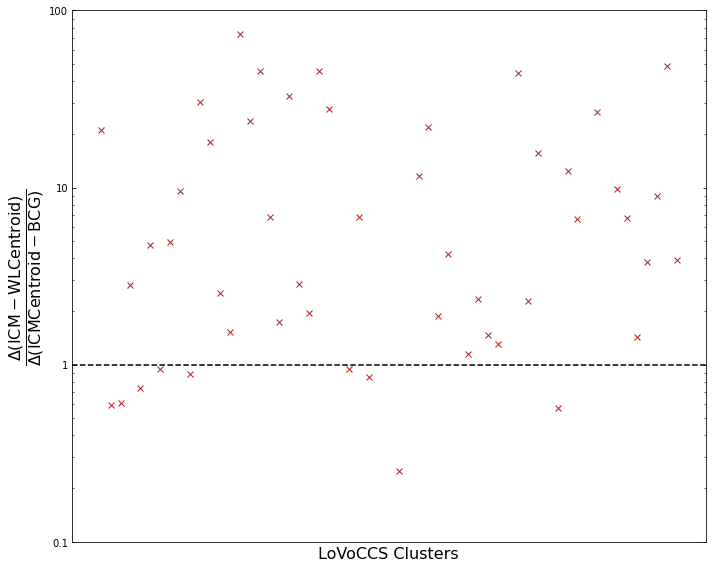

In [86]:
plt.figure(figsize=(10, 8))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)

# plt.plot(prop_hav_sep.value, bcg_prop_hav_sep.value, 'x', color='coral')

plt.plot(range(len(prop_hav_sep)), prop_hav_sep.value/bcg_prop_hav_sep.value, 'x', color='firebrick')

plt.axhline(1, color='black', linestyle='dashed', label="Parity")

plt.ylim(0.1, 100)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda inp, _: '{:g}'.format(inp)))
plt.ylabel(r"$\dfrac{\Delta\rm{(ICM - WL Centroid)}}{\Delta\rm{(ICM Centroid - BCG)}}$", fontsize=16)

plt.xticks([])
plt.xlabel("LoVoCCS Clusters", fontsize=16)

plt.tight_layout()
plt.savefig("../../outputs/figures/icmcent-wlmasscent_icmcent-bcg_offset_ratio.pdf")
plt.show()